In [1]:
pwd

'/Users/sdc'

In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import (datasets,model_selection as skms, neighbors, metrics as mt, linear_model as lm)
import sqlite3, pandas as pd

In [3]:
"""Conexión a base de datos y consulta simple"""
conn = sqlite3.connect('diabetes.db')

pacientes=pd.read_sql('Select * from pacientes',conn)

tableNames={'s1':'TC','s2':'LDL','s3':'HDL','s4':'TSH','s5':'LGT','s6':'GLU','y':'Probabilidad'}
pacientes.rename(columns=tableNames,inplace=True)
pacientes_df = pacientes

type(pacientes_df)


pandas.core.frame.DataFrame

In [4]:
y = pacientes_df.iloc[:,-1:].values
y
type(y)

numpy.ndarray

In [5]:
x = pacientes_df.iloc[:,:-1]
x

,age,sex,bmi,bp,TC,LDL,HDL,TSH,LGT,GLU
0,59,2,32.1,101.00,157,93.2,38,4.00,4.8598,87
1,48,1,21.6,87.00,183,103.2,70,3.00,3.8918,69
2,72,2,30.5,93.00,156,93.6,41,4.00,4.6728,85
3,24,1,25.3,84.00,198,131.4,40,5.00,4.8903,89
4,50,1,23.0,101.00,192,125.4,52,4.00,4.2905,80
...,...,...,...,...,...,...,...,...,...,...
437,60,2,28.2,112.00,185,113.8,42,4.00,4.9836,93
438,47,2,24.9,75.00,225,166.0,42,5.00,4.4427,102
439,60,2,24.9,99.67,162,106.6,43,3.77,4.1271,95
440,36,1,30.0,95.00,201,125.2,42,4.79,5.1299,85


In [6]:
"""revisamos cuantos null hay"""

pacientes_df.isnull().sum()

age             0
sex             0
bmi             0
bp              0
TC              0
LDL             0
HDL             0
TSH             0
LGT             0
GLU             0
Probabilidad    0
dtype: int64

In [7]:
"""datos de estadistica con describe"""
pacientes_df.describe()

,age,sex,bmi,bp,TC,LDL,HDL,TSH,LGT,GLU,Probabilidad
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,1.468326,26.375792,94.647014,189.140271,115.439140,49.789593,4.070249,4.641411,91.260181,152.133484
std,13.109028,0.499561,4.418122,13.831283,34.608052,30.413081,12.933585,1.290450,0.522391,11.496335,77.093005
min,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000,25.000000
25%,38.250000,1.000000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000,87.000000
50%,50.000000,1.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000,140.500000
75%,59.000000,2.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000,211.500000
max,79.000000,2.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000,346.000000


In [8]:
"""correlación entre todas las varibales"""
corr=pacientes_df.corr()

print(corr)

                   age       sex       bmi        bp        TC       LDL  \
age           1.000000  0.173737  0.185085  0.335428  0.260061  0.219243   
sex           0.173737  1.000000  0.088161  0.241010  0.035277  0.142637   
bmi           0.185085  0.088161  1.000000  0.395411  0.249777  0.261170   
bp            0.335428  0.241010  0.395411  1.000000  0.242464  0.185548   
TC            0.260061  0.035277  0.249777  0.242464  1.000000  0.896663   
LDL           0.219243  0.142637  0.261170  0.185548  0.896663  1.000000   
HDL          -0.075161 -0.379190 -0.366895 -0.178692  0.051496 -0.196441   
TSH           0.203841  0.332115  0.413807  0.257650  0.542207  0.659817   
LGT           0.270774  0.149916  0.446157  0.393480  0.515503  0.318357   
GLU           0.301731  0.208133  0.388680  0.390430  0.325717  0.290600   
Probabilidad  0.187889  0.043062  0.586450  0.441482  0.212022  0.174054   

                   HDL       TSH       LGT       GLU  Probabilidad  
age          -0.07

In [9]:
x_train,x_test,y_train,y_test = skms.train_test_split(x,y,test_size= 20, random_state=42)

In [10]:
print(x_train)
print(y_train)
print(x_test)
print(y_test)

     age  sex   bmi     bp   TC    LDL  HDL  TSH     LGT  GLU
9     29    1  30.0   85.0  180   93.4   43  4.0  5.3845   88
181   62    1  22.4   79.0  222  147.4   59  4.0  4.3567   76
55    37    1  21.8   84.0  184  101.0   73  3.0  3.9120   93
399   65    2  28.5  109.0  201  123.0   46  4.0  5.0752   96
30    32    1  30.5   89.0  182  110.6   56  3.0  4.3438   89
..   ...  ...   ...    ...  ...    ...  ...  ...     ...  ...
106   22    1  19.3   82.0  156   93.2   52  3.0  3.9890   71
270   50    2  29.2  119.0  162   85.2   54  3.0  4.7362   95
348   57    1  24.5   93.0  186   96.6   71  3.0  4.5218   91
435   45    1  24.2   83.0  177  118.4   45  4.0  4.2195   82
102   23    1  29.0   90.0  216  131.4   65  3.0  4.5850   91

[422 rows x 10 columns]
[[310]
 [ 64]
 [128]
 [232]
 [129]
 [118]
 [263]
 [ 77]
 [ 48]
 [107]
 [140]
 [113]
 [ 90]
 [164]
 [180]
 [233]
 [ 42]
 [ 84]
 [172]
 [ 63]
 [ 48]
 [108]
 [156]
 [168]
 [ 90]
 [ 52]
 [200]
 [ 87]
 [ 90]
 [258]
 [136]
 [158]
 [ 69]


In [11]:
"""Prueba modelo de regresión"""
#clasificador knn
model = lm.LinearRegression().fit(x_train,y_train)
#entrenamiento


#mandamos datos a predecir e imprimimos 

predict = model.predict(x_test)
print(predict)

print(y_test)

mt.r2_score(y_test,predict)#tarea mejorar el porcentaje con un modelo de regresión(lineal, minimos cuadrados,arboles de decisiones)knn





[[141.96817865]
 [176.34269555]
 [134.5728855 ]
 [287.21582473]
 [122.56179383]
 [ 96.45863712]
 [256.83066496]
 [184.85060933]
 [ 92.87909232]
 [111.40303693]
 [ 98.53073629]
 [166.00936988]
 [ 58.5182552 ]
 [205.10751884]
 [100.72445274]
 [130.34298319]
 [218.47245347]
 [245.83606179]
 [193.01901814]
 [214.34882804]]
[[219]
 [ 70]
 [202]
 [230]
 [111]
 [ 84]
 [242]
 [272]
 [ 94]
 [ 96]
 [ 94]
 [252]
 [ 99]
 [297]
 [135]
 [ 67]
 [295]
 [264]
 [170]
 [275]]


0.5050282553392431

<AxesSubplot: >

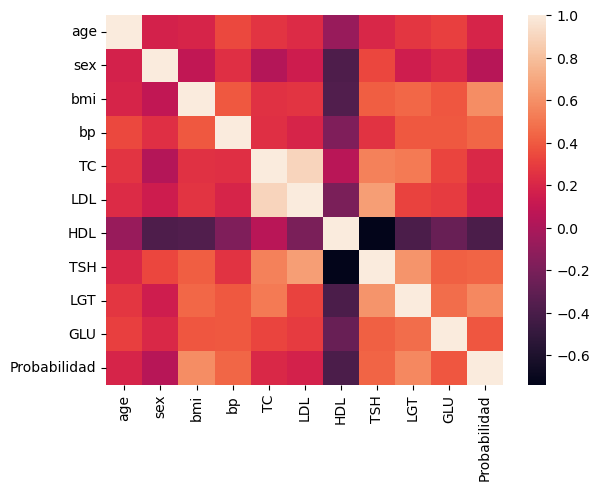

In [12]:
sns.heatmap(corr)#mapa de calor

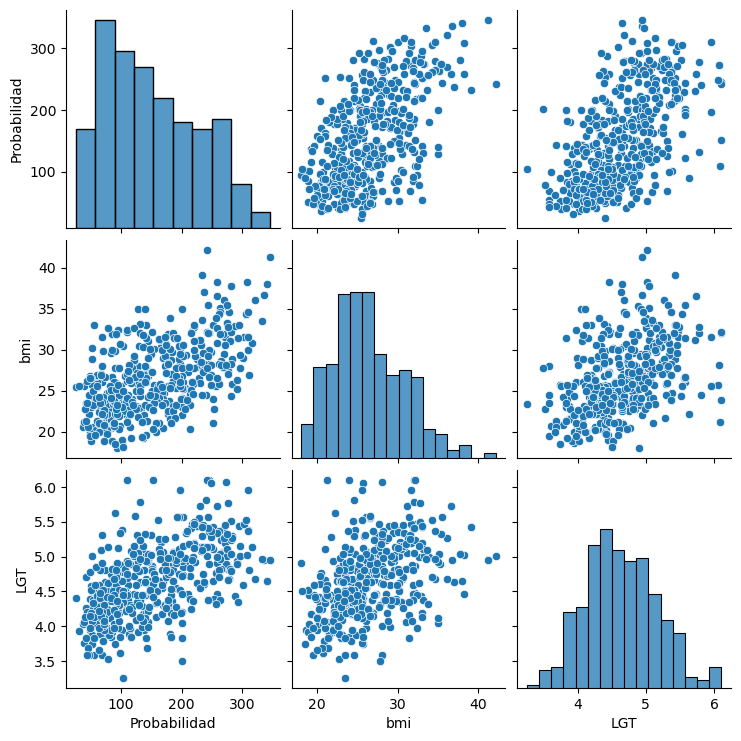

In [13]:
sns.pairplot(pacientes_df[['Probabilidad','bmi','LGT']])


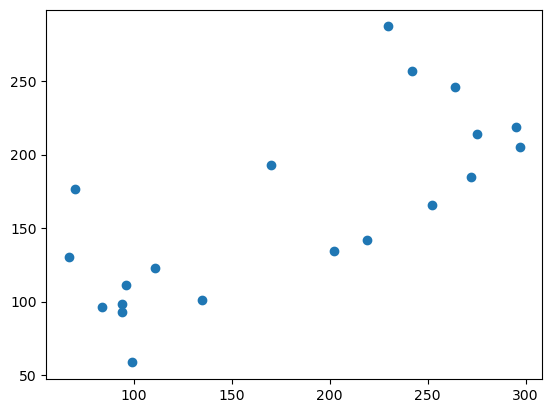

In [14]:
plt.scatter(y_test,predict)


In [15]:
"""

REGRESION LINEALL - MAPA CALOR CORR- PAIRPLOT 2 DATOS --DATOS REALES VS PREDICHOS

"""



'\n\nREGRESION LINEALL - MAPA CALOR CORR- PAIRPLOT 2 DATOS --DATOS REALES VS PREDICHOS\n\n'

<AxesSubplot: xlabel='bmi', ylabel='Probabilidad'>

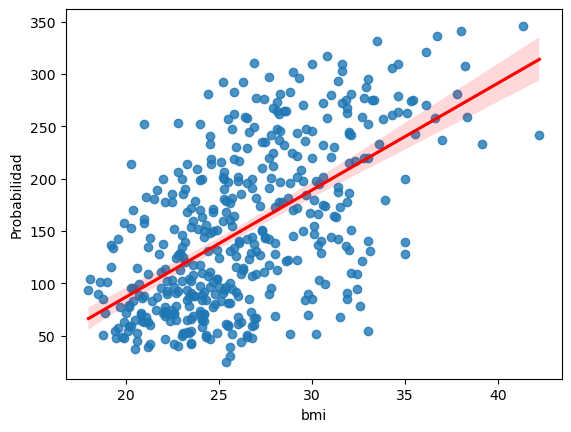

In [16]:
sns.regplot(data=pacientes_df,x='bmi',y='Probabilidad',line_kws={'color':'red'})

<AxesSubplot: xlabel='LDL', ylabel='TC'>

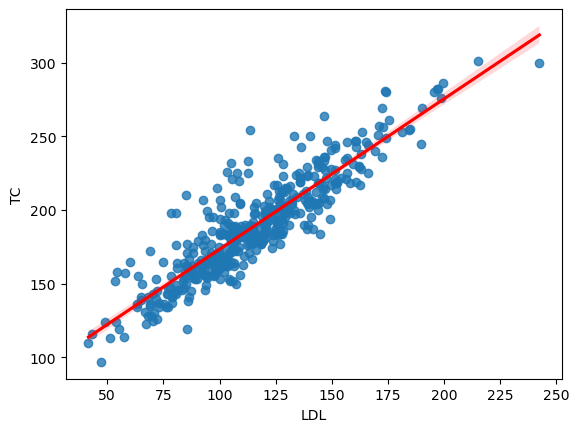

In [17]:
sns.regplot(data=pacientes_df,x='LDL',y='TC',line_kws={'color':'red'})